In [18]:
# Library imports (see /Utilities/setup_env.py for full import list and figure setup)

from pathlib import Path
import sys

repo_root = Path.cwd().parents[0]  # .../Figure_analysis
repo_root = repo_root.parent       # repo root
sys.path.insert(0, str(repo_root))

from Figure_analysis.Utilities.setup_env import *

mpl.rcParams.update({"font.size": 9})

In [19]:
def thousands(x, pos):
    'The two args are the value and tick position, helper fn'
    return '%1.2f' % (x * 1e3)

formatter = FuncFormatter(thousands)

In [20]:
def fit_decay(x, y):
    # Fit data to single exponential decay model
    model = ExponentialModel()
    params = model.guess(y, x = x)
    result = model.fit(y, params, x = x)
    return result

In [21]:
file_name = '25_a'
df = pd.read_csv(f'NMR_data/peak_integrals/{file_name}.csv')
decay_fit = fit_decay(df.iloc[:, 0], df.iloc[:, 1])
decay_fit

In [22]:
def plot_decay_tc(file_name, temp, ax, cmap, norm):
    df = pd.read_csv(f'NMR_data/peak_integrals/{file_name}.csv')
    decay_fit = fit_decay(df.iloc[:, 0], df.iloc[:, 1])
    decay_param = decay_fit.params['decay']

    x_vals = np.linspace(0, 7500, 100)
    y_vals = np.exp(-(1 / decay_param) * x_vals)
    color = cmap(norm(temp))
    ax.plot(x_vals / 3600., y_vals, label=f'{temp} °C', color=color)

/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_66760/2868563458.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('copper')
/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_66760/2868563458.py:13: RuntimeWarning: divide by zero encountered in log
  y_lin_fit = np.log(1 - y_vals)
/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_66760/2868563458.py:13: RuntimeWarning: divide by zero encountered in log
  y_lin_fit = np.log(1 - y_vals)
/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_66760/2868563458.py:13: RuntimeWarning: divide by zero encountered in log
  y_lin_fit = np.log(1 - y_vals)
/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_66760/2868563458.py:13: RuntimeWarning: divide by zero encountered in log
  y_lin_fit = np.log(1 - y_vals)


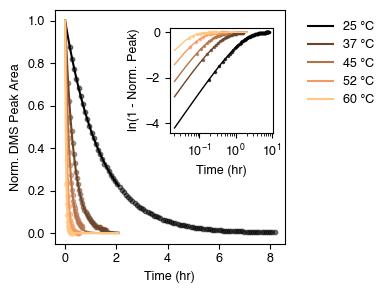

In [23]:
def plot_decay_tc(file_name, temp, ax, inset_ax, cmap, norm):
    df = pd.read_csv(f'NMR_data/peak_integrals/{file_name}.csv')
    decay_fit = fit_decay(df.iloc[:, 0], df.iloc[:, 1])
    decay_param = decay_fit.params['decay']
    amplitude = decay_fit.params['amplitude']
    x_vals = np.linspace(0, 7500, 100)
    y_vals = np.exp(-(1 / decay_param) * x_vals)
    y_data = df.iloc[:, 1] / amplitude  # Normalize by amplitude
    
    
    # log(1 - y_data)
    y_lin = np.log(1 - y_data)
    y_lin_fit = np.log(1 - y_vals)
    color = cmap(norm(temp))
    ax.scatter(df.iloc[:, 0] / 3600., y_data, color=color, s=10, alpha=0.5)
    ax.plot(x_vals / 3600., y_vals, label=f'{temp} °C', color=color)

    # Inset plot: ln(y)
    inset_ax.plot(df.iloc[:, 0] / 3600., y_lin, 'o', color=color, markersize=1.5, alpha=0.7)
    # linear fit 

    inset_ax.plot(x_vals / 3600., y_lin_fit, '-', color=color, linewidth=1)


# Define temperature values and normalization
temps = [25, 37, 45, 52, 60]
norm = mcolors.Normalize(vmin=min(temps), vmax=max(temps))
cmap = cm.get_cmap('copper')

fig, ax = plt.subplots(figsize=(4, 3))


# Add inset axis

inset_ax = inset_axes(
    ax,
    width="45%", height="45%",
    bbox_to_anchor=(0.5, -0.075, 1, 1),  # must be 4-tuple when using "%"-based size
    bbox_transform=ax.transAxes,
    loc='upper left',
    borderpad=0
)#inset_ax.tick_params()
inset_ax.set_xlabel('Time (hr)')
inset_ax.set_ylabel('ln(1 - Norm. Peak)')

# set x-axis to log scale
inset_ax.set_xscale('log')

# xlim 0 - 6, ylim 0 to -5
#inset_ax.set_xlim(0, 2)
#inset_ax.set_ylim(-5, 0)

# Main plot
plot_decay_tc('25_a', 25, ax, inset_ax, cmap, norm)
plot_decay_tc('37_a', 37, ax, inset_ax, cmap, norm)
plot_decay_tc('45_a', 45, ax, inset_ax, cmap, norm)
plot_decay_tc('52_a', 52, ax, inset_ax, cmap, norm)
plot_decay_tc('60_a', 60, ax, inset_ax, cmap, norm)

ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.05, 1.0), )
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Norm. DMS Peak Area')
plt.tight_layout()
plt.savefig('dms_nmr_decay.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


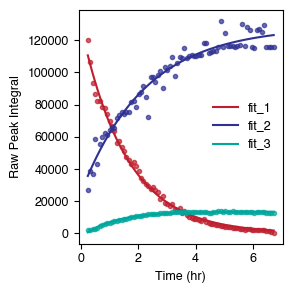

In [25]:

df = pd.read_csv('NMR_data/20230726-DMS-only-25b-schwalbe/all_products_25C.csv')

# Define time column and signal/fit pairs
time = df.iloc[:, 0] / 3600  # convert seconds to hours
pairs = [
    ('Integral(3.916,3.888)', 'fit_1'),
    ('Integral(3.622,3.587)', 'fit_2'),
    ('Integral(2.917,2.891)', 'fit_3'),
]
colors = ['#be1e2d', '#2e3192', '#00a79d']

# Plot
plt.figure(figsize=(3, 3))
for (raw, fit), color in zip(pairs, colors):
    plt.plot(time, df[raw], 'o', color=color, markersize=3, alpha=0.7)
    plt.plot(time, df[fit], '-', label=f'{fit}', color=color)

plt.xlabel('Time (hr)')
plt.ylabel('Raw Peak Integral')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('dms_nmr_integrals.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.05, 1.0), )
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Norm. DMS Peak Area')
plt.tight_layout()
plt.savefig('dms_products.pdf')

,Ea_kcal_per_mol,Ea_error,lnA,lnA_error
group,,,,
nmr,20.999840,1.711583,26.885756,2.734402
4U_wt,18.762551,2.469306,23.452496,3.946536
4U_a8c,19.694234,2.495644,25.178269,3.985959
